In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

df = pd.read_csv("../src/Flux_HistoPrice_example.csv")

## Explore the data

In [4]:
df.head()

,vnid,vintage,PriceHistory
0,1000001,2013,"[{202107,38}]"
1,1000232,2008,"[{201212,18},{201301,18},{201303,18},{201306,1..."
2,1000232,2007,"[{201203,18},{201206,19},{201209,18},{201303,2..."
3,1000245,2005,"[{201201,81},{201203,81},{201206,81},{201209,8..."
4,1000287,2010,"[{201506,19},{201612,41},{201701,40},{201703,4..."


In [5]:
df.columns

Index(['vnid', 'vintage', 'PriceHistory'], dtype='object')

In [6]:
df["vintage"].describe()

count      39.000000
mean     2009.743590
std         4.540565
min      1990.000000
25%      2008.000000
50%      2010.000000
75%      2012.000000
max      2019.000000
Name: vintage, dtype: float64

### Check if we have duplicates or null values

In [7]:
df.duplicated().sum()

1

In [8]:
duplicates = df[df.duplicated(keep=False)]
print(duplicates)

       vnid  vintage                                       PriceHistory
9   1000287     2011  [{201812,45},{201901,43},{201903,44},{201906,4...
10  1000287     2011  [{201812,45},{201901,43},{201903,44},{201906,4...


🔍 - Here, we have the same line. So I'm going to delete this duplicate.

In [9]:
df = df.drop_duplicates()

In [10]:
df.head(12)

,vnid,vintage,PriceHistory
0,1000001,2013,"[{202107,38}]"
1,1000232,2008,"[{201212,18},{201301,18},{201303,18},{201306,1..."
2,1000232,2007,"[{201203,18},{201206,19},{201209,18},{201303,2..."
3,1000245,2005,"[{201201,81},{201203,81},{201206,81},{201209,8..."
4,1000287,2010,"[{201506,19},{201612,41},{201701,40},{201703,4..."
5,1000287,1990,"[{200912,79},{201012,71},{201101,70},{201206,1..."
6,1000287,2008,"[{201606,41},{201609,41},{201612,42},{201701,4..."
7,1000287,2012,"[{201501,12},{201503,12},{202003,45},{202006,4..."
8,1000287,2009,"[{201403,41},{201406,41},{201409,35},{201412,4..."
9,1000287,2011,"[{201812,45},{201901,43},{201903,44},{201906,4..."


In [11]:
df.isna().sum()

vnid            0
vintage         0
PriceHistory    0
dtype: int64

## Refactoring the 'Pricehistory' column

### First try - ❌

In [12]:
# df["Date"] = None
# df["Prix"] = None


# for index, row in df.iterrows():
#     price_history = row["PriceHistory"]
#     for pair in eval(price_history):
#         date, price = pair
#         df.at[index, "Date"] = date
#         df.at[index, "Prix"] = price

### Second try - ✅

In [13]:
def extract_dates_prices(row):
    price_history = row["PriceHistory"]
    dates = []
    prices = []
    matches = re.findall(r"{(\d+),(\d+)}", price_history)
    for match in matches:
        date, price = match
        dates.append(int(date))
        prices.append(int(price))
    return dates, prices

In [14]:
df[["date", "price"]] = df.apply(lambda row: pd.Series(extract_dates_prices(row)), axis=1)

In [15]:
df.head()

,vnid,vintage,PriceHistory,date,price
0,1000001,2013,"[{202107,38}]",[202107],[38]
1,1000232,2008,"[{201212,18},{201301,18},{201303,18},{201306,1...","[201212, 201301, 201303, 201306, 201309, 20131...","[18, 18, 18, 18, 17, 17, 27, 27, 23, 25, 25, 2..."
2,1000232,2007,"[{201203,18},{201206,19},{201209,18},{201303,2...","[201203, 201206, 201209, 201303, 201306, 20130...","[18, 19, 18, 26, 26, 24, 28, 28, 33, 30, 30, 2..."
3,1000245,2005,"[{201201,81},{201203,81},{201206,81},{201209,8...","[201201, 201203, 201206, 201209, 201303, 20130...","[81, 81, 81, 81, 81, 82, 82, 92, 92, 92, 94, 9..."
4,1000287,2010,"[{201506,19},{201612,41},{201701,40},{201703,4...","[201506, 201612, 201701, 201703, 201706, 20170...","[19, 41, 40, 40, 40, 39, 38, 38, 42, 43, 47, 4..."


In [16]:
df = df.drop(["PriceHistory"], axis=1)

In [17]:
df.head()

,vnid,vintage,date,price
0,1000001,2013,[202107],[38]
1,1000232,2008,"[201212, 201301, 201303, 201306, 201309, 20131...","[18, 18, 18, 18, 17, 17, 27, 27, 23, 25, 25, 2..."
2,1000232,2007,"[201203, 201206, 201209, 201303, 201306, 20130...","[18, 19, 18, 26, 26, 24, 28, 28, 33, 30, 30, 2..."
3,1000245,2005,"[201201, 201203, 201206, 201209, 201303, 20130...","[81, 81, 81, 81, 81, 82, 82, 92, 92, 92, 94, 9..."
4,1000287,2010,"[201506, 201612, 201701, 201703, 201706, 20170...","[19, 41, 40, 40, 40, 39, 38, 38, 42, 43, 47, 4..."


#### Know I want convert date to datetime format

In [18]:
from datetime import datetime

data = []

# Iterate through each row
for i, row in df.iterrows():
    for date, price in zip(row['date'], row['price']):
        
        date_str = str(date) + "01"
        date_dt = datetime.strptime(date_str, '%Y%m%d')
        date_dt = date_dt.replace(day=1)
        
        data.append({'vnid': row['vnid'], 'vintage': row['vintage'], 'date': date_dt, 'price': price})

# Create new dataframe
df_new = pd.DataFrame(data)

In [19]:
df_new.info() # Check for type and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   vnid     1254 non-null   int64         
 1   vintage  1254 non-null   int64         
 2   date     1254 non-null   datetime64[ns]
 3   price    1254 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 39.3 KB


In [20]:
# df_new['date'] = pd.to_datetime(df_new['date'], format='%Y%m')

In [21]:
df_new.head()

,vnid,vintage,date,price
0,1000001,2013,2021-07-01,38
1,1000232,2008,2012-12-01,18
2,1000232,2008,2013-01-01,18
3,1000232,2008,2013-03-01,18
4,1000232,2008,2013-06-01,18


In [22]:
df_new.sort_values(by="date", ascending=True)

,vnid,vintage,date,price
574,1000535,2004,2007-03-01,32
575,1000535,2004,2007-09-01,37
576,1000535,2004,2008-01-01,36
577,1000535,2004,2008-04-01,32
578,1000535,2004,2008-06-01,34
...,...,...,...,...
513,1000391,2010,2022-10-01,170
1181,1000580,2009,2022-10-01,153
657,1000535,2018,2022-10-01,40
871,1000564,2009,2022-10-01,104


# 📌 Codex - VNID and VINTAGE

In [23]:
vnid_list = df_new["vnid"].unique()

In [24]:
for vnid in vnid_list:
    vnid_data = df_new[df_new["vnid"] == vnid]
    vintage_list = vnid_data["vintage"].unique()
    
    vintage_list = sorted(vintage_list)
    
    print(f"vnid : {vnid}, vintage : {vintage_list}")

vnid : 1000001, vintage : [2013]
vnid : 1000232, vintage : [2007, 2008]
vnid : 1000245, vintage : [2005]
vnid : 1000287, vintage : [1990, 2007, 2008, 2009, 2010, 2011, 2012, 2013]
vnid : 1000359, vintage : [2016]
vnid : 1000391, vintage : [2010]
vnid : 1000535, vintage : [2004, 2007, 2018, 2019]
vnid : 1000548, vintage : [2011]
vnid : 1000564, vintage : [2007, 2008, 2009, 2010, 2011, 2012, 2014]
vnid : 1000577, vintage : [2007, 2008, 2009, 2010, 2011, 2012, 2013]
vnid : 1000580, vintage : [2007, 2009, 2011, 2013]
vnid : 1000593, vintage : [2010]


# Analysis

### Find the most expensive price wine by vintage

In [25]:
df_new.to_csv("../src/cleaned_histoprice.csv", index=False)

In [28]:
# Définir une fonction pour calculer la moyenne des prix en utilisant les prix présents dans "date"
def calculate_average_price(row):
    return row["price"].mean()

# Appliquer la fonction lors du regroupement
average_prices = df_new.groupby(["vnid", "vintage"]).apply(calculate_average_price)

# Afficher les moyennes des prix
print(average_prices)

vnid     vintage
1000001  2013        38.000000
1000232  2007        26.533333
         2008        28.580645
1000245  2005        91.593750
1000287  1990       147.960784
         2007        44.460317
         2008        48.250000
         2009        47.145455
         2010        53.302326
         2011        52.031250
         2012        47.407407
         2013        37.080000
1000359  2016        29.947368
1000391  2010        98.413793
1000535  2004        34.344262
         2007        41.022727
         2018        54.478261
         2019        52.500000
1000548  2011        44.617021
1000564  2007        64.333333
         2008        57.257143
         2009        79.909091
         2010        75.166667
         2011        89.758621
         2012        94.970588
         2014        84.875000
1000577  2007        64.227273
         2008        63.629630
         2009        97.363636
         2010        72.119048
         2011        87.000000
         2012        7

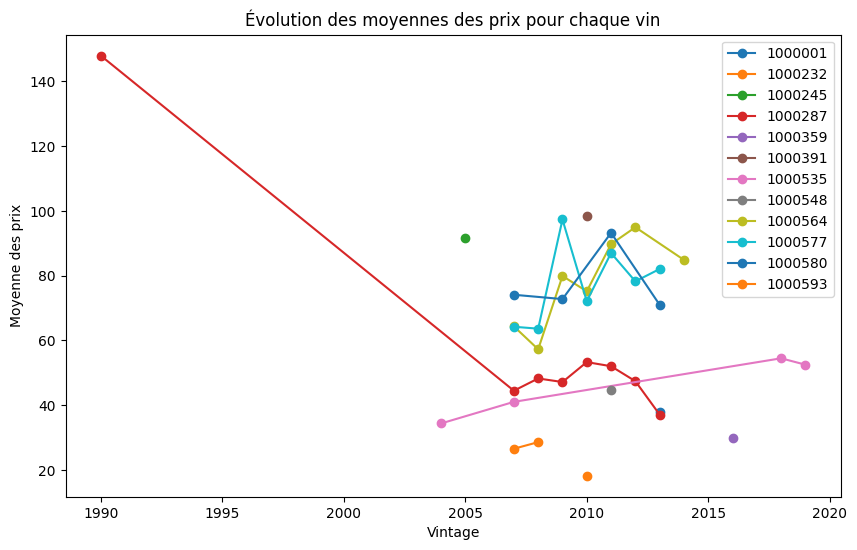

In [29]:
import matplotlib.pyplot as plt

# Grouper les données par vnid et vintage et calculer la moyenne des prix
average_prices = df_new.groupby(["vnid", "vintage"])["price"].mean()

# Créer un graphique en courbes avec points de données
fig, ax = plt.subplots(figsize=(10, 6))

for vnid in df_new["vnid"].unique():
    vnid_data = average_prices[vnid]
    ax.plot(vnid_data.index, vnid_data.values, marker="o", label=vnid)

ax.set_xlabel("Vintage")
ax.set_ylabel("Moyenne des prix")
ax.set_title("Évolution des moyennes des prix pour chaque vin")
ax.legend()
plt.show()

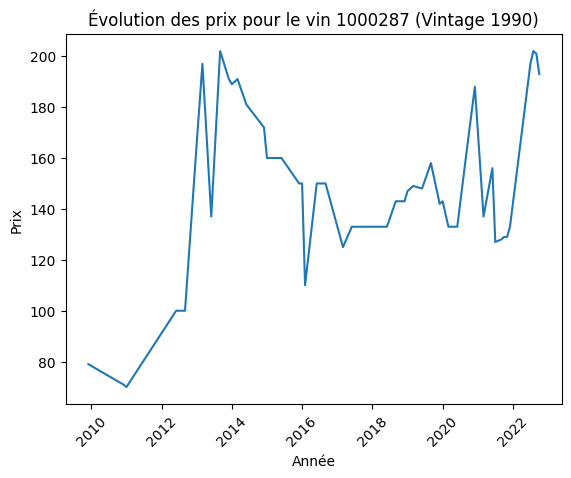

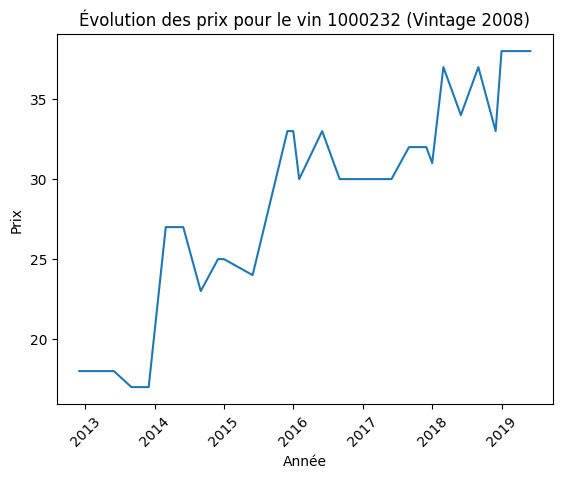

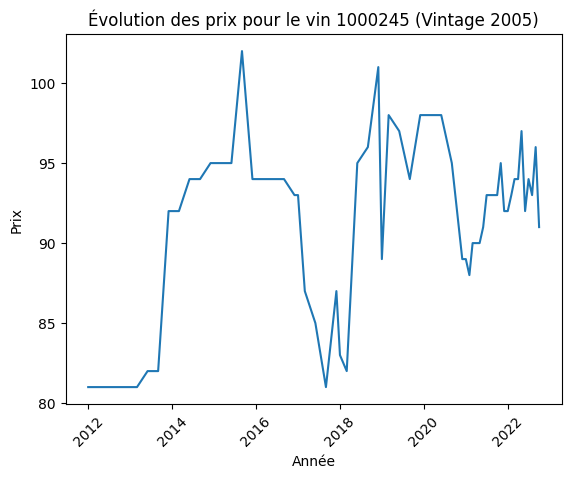

In [30]:
import matplotlib.pyplot as plt

# Liste des vnid et vintages à analyser
vnid_list = [1000287, 1000232, 1000245]
vintage_list = [1990, 2008, 2005]

# Boucle pour créer les graphiques pour chaque combinaison de vnid et vintage
for vnid, vintage in zip(vnid_list, vintage_list):
    # Filtrage du DataFrame pour ne conserver que les lignes correspondant au vin spécifique
    wine_data = df_new[(df_new['vnid'] == vnid) & (df_new['vintage'] == vintage)]
    
    # Tri des données par date croissante
    wine_data = wine_data.sort_values('date')
    
    # Création du graphique
    plt.plot(wine_data['date'], wine_data['price'])
    plt.xlabel('Année')
    plt.ylabel('Prix')
    plt.title('Évolution des prix pour le vin {} (Vintage {})'.format(vnid, vintage))
    plt.xticks(rotation=45)
    plt.show()
